# Group no. 5 : Nitish goyal 18510053 Rachana choudhary 18510063

## One dimensional time-independent schrodinger equation


This is a take home lab assignment. You may submit it in the usual way along with Mini Project 2. 

For all submissions, credit share declaration is a must. 

__Note__: Amit Reza will be available today from 4-6 pm (usual lab hours) in Block 6/Common Seating area on the 3rd floor to clarify your doubts about this lab assignment.

Use the shooting method to obtain the lowest six energy levels for an infinitely deep square well of size $L = 0.5$ Å. This will require that you write a program that can deal with both even- and odd- parity solutions. 

Examine how the energy eigenvalues varies with ehe quantum number and test your vales against the exact (analytical) results. It is also instructive to examine the behavior as a function of the spatial step size $\Delta x$. Study how the ground state energy varies with the choice of step size; try $\Delta x = 0.05, 0.01 and 0.005$.

Compare the wavefunctions - make sure that they are properly normalized! Check that the stationary states corrsponding to different quantum numbers are orthonormal. You may use the `numpy` function `dot` for evaluating the dot products. https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html


When solving the TISE, work in length scaled to $\bar L$ = 1 Å, and use the appropriate energy scale $\bar E$. For such a well, $\psi(x) = 0, \; \text{for} \; |x| \geq L/2$. 

For even- and odd- parity solutions, plot $\psi(L/2)$ for different values of $0 \leq E/\bar{E} \leq 10$.




In [37]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [38]:
dx= 0.005
x0= -0.5
xf= 0.5
n= int((xf- x0)/dx)
x= np.linspace(x0, xf, n)
step= 0.0001
vmax= 1500
dx= 0.005
def onedpotential(x, vmax):
    onedpotential = np.zeros(len(x))
    for i in range (0, len(x)):
        if x[i]<=0.5:
            onedpotential[i]=0
        elif x[i]>=-0.5:
            onedpotential[i]=0
        else:
            onedpotential[i] = vmax
        return onedpotential
    

In [39]:
energy= 4.93480220055
def squrewell(p,dx, step, x, saii, saiii, n):
    energyl=[]
    onedpotential= p(x, vmax)
    sai= np.zeros(len(x))
    sai[int(len(x)/2)]=saii
    sai[int((len(x)/2)-1)]= saiii
    i=0
    e=n**2*energy
    for i in range (0, 200):

        for j in range (int(len(x)/2), int(len(x)-1)):
            sai[j+1]= 2*sai[j]- sai[j-1]-2*(e- onedpotential[j])*dx**2*sai[j]
            if n==2 or n==4 or n==6:
                   for k in range (0, int(len(x)/2-1)):
                           sai[k]= -sai[len(x)-1-k]
                            
            if n==1 or n==3 or n==5:            
                   for k in range (0, int(len(x)/2)-1):
            
                           sai[k]= sai[len(x)-1-k]
            
            
        if abs(sai[len(x)-1] )<10**-5:
            return sai, e, i, energyl, sai[len(x)-1]
            break
        else: 
            if n==4 or n==3:
                if sai[len(x)-1]<0:
                    e= e+step
                    i=i+1
                    energyl.append(e)
                
                if sai[len(x)-1]>0:
                    e = e-step
                    i= i+1
                    energyl.append(e)
            else:     
                if sai[len(x)-1]>0:
                    e= e+ step
                    i=i+1
                    energyl.append(e)
                
                if sai[len(x)-1]<0:
                    e = e-step
                    i= i+1
                    energyl.append(e) 
    return  sai, e , i , energyl, sai[len(x)-1]         


    
    


### program to deal with even and odd parity solution

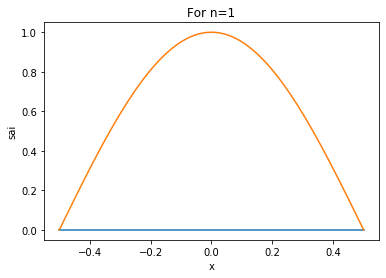

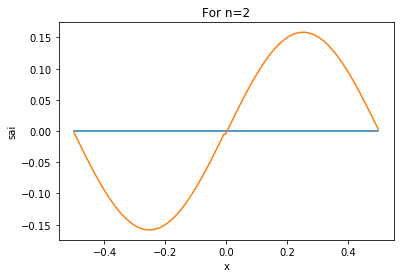

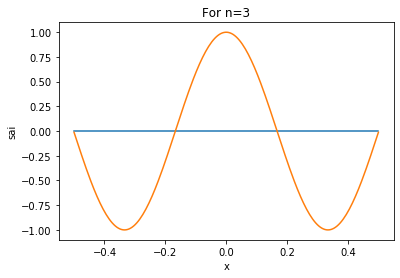

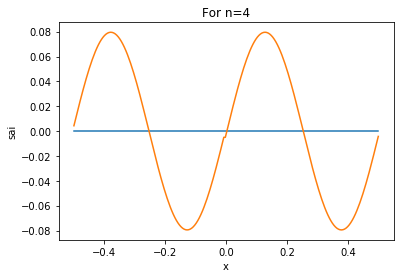

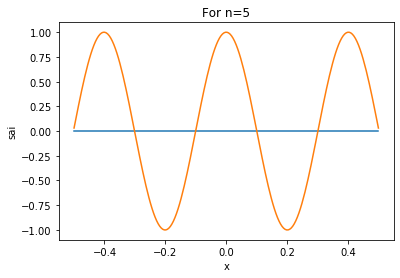

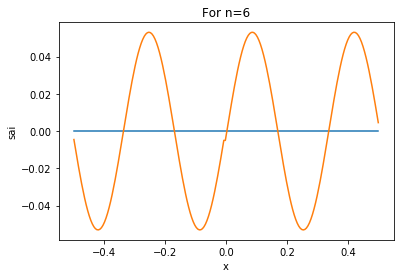

In [40]:
V = onedpotential(x, vmax)   

sai1, e1, i1, energyl1, a1= squrewell(onedpotential,  dx, 0.001, x, 1, 1, 1 )
sai2, e2, i2, energyl2, a2= squrewell(onedpotential,  dx,  0.001, x , 0, -dx, 2)
sai3, e3, i3, energyl3, a3= squrewell(onedpotential,  dx, 0.001, x , 1, 1, 3)
sai4, e4, i4, energyl4, a4= squrewell(onedpotential,  dx, 0.001, x , 0, -dx, 4)
sai5, e5, i5, energyl5, a5= squrewell(onedpotential,  dx, 0.001, x , 1, 1,5)
sai6, e6, i6, energyl6, a6= squrewell(onedpotential,  dx, 0.001, x , 0, -dx,6 )

plt.plot(x, V)
plt.figure(1)
plt.title("For n=1")
plt.plot(x, sai1)
plt.xlabel('x')
plt.ylabel('sai')



plt.figure(2)
plt.title("For n=2")
plt.plot(x, V)
plt.plot(x, sai2)
plt.xlabel('x')
plt.ylabel('sai')


plt.figure(3)
plt.title("For n=3")
plt.plot(x,V)
plt.plot(x, sai3)
plt.xlabel('x')
plt.ylabel('sai')


plt.figure(4)
plt.title("For n=4")
plt.plot(x,V)
plt.plot(x, sai4)
plt.xlabel('x')
plt.ylabel('sai')



plt.figure(5)
plt.title("For n=5")
plt.plot(x,V)
plt.plot(x, sai5)
plt.xlabel('x')
plt.ylabel('sai')


plt.figure(6)
plt.title("For n=6")
plt.plot(x,V)
plt.plot(x, sai6)

plt.xlabel('x')
plt.ylabel('sai')
plt.show()


### Odd parity solution

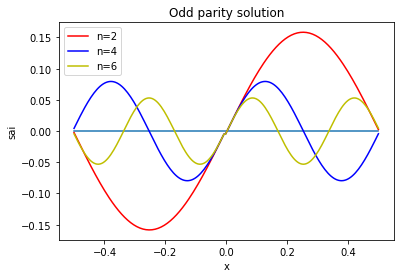

In [41]:
plt.figure(7)
plt.plot(x,V)
plt.plot(x, sai2,'r',label='n=2')
plt.plot(x, sai4,'b',label='n=4')
plt.plot(x, sai6,'y',label='n=6')
plt.title('Odd parity solution')
plt.xlabel('x')
plt.ylabel('sai')

plt.legend()
plt.show()



### Even parity solution

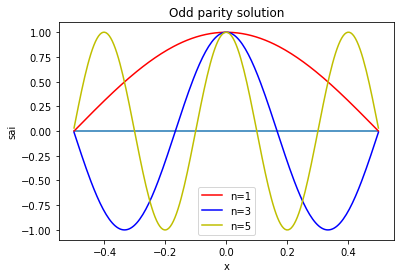

In [42]:
plt.figure(7)
plt.plot(x,V)
plt.plot(x, sai1,'r',label='n=1')
plt.plot(x, sai3,'b',label='n=3')
plt.plot(x, sai5,'y',label='n=5')
plt.title('Odd parity solution')
plt.xlabel('x')
plt.ylabel('sai')

plt.legend()
plt.show()


### energy eigenvalues varies with the quantum number :-

In [43]:
t2=[]
aaa=print(" for n=1,e1=",e1)
t2.append(e1)
print(" for n=2,e2=",e2)
t2.append(e2)
print(" for n=3,e3=",e3)
t2.append(e3)
print(" for n=4,e4=",e4)
t2.append(e4)
print(" for n=5,e5=",e5)
t2.append(e5)
print(" for n=6,e6=",e6)
t2.append(e6)
t2=np.array(t2)

print(t2)



 for n=1,e1= 4.984802200550017
 for n=2,e2= 19.939208802200245
 for n=3,e3= 44.61321980494954
 for n=4,e4= 79.15683520880096
 for n=5,e5= 123.57005501375096
 for n=6,e6= 177.85287921980097
[  4.9848022   19.9392088   44.6132198   79.15683521 123.57005501
 177.85287922]


### The exact (analytical) energy:- 

In [44]:
v=(np.pi)**2/2
t1=[]
print(v)
fe1=print("for n=1,e=",1*v)
t1.append(1*v)
se1=print("for n=2,e=",4*v)
t1.append(4*v)
te1=print("for n=3,e=",9*v)
t1.append(9*v)
fe2=print("for n=4,e=",16*v)
t1.append(16*v)
fe3=print("for n=5,e=",25*v)
t1.append(25*v)
se2=print("for n=6,e=",36*v)
t1.append(36*v)
t1=np.array(t1)

print(t1)




4.934802200544679
for n=1,e= 4.934802200544679
for n=2,e= 19.739208802178716
for n=3,e= 44.41321980490211
for n=4,e= 78.95683520871486
for n=5,e= 123.37005501361698
for n=6,e= 177.65287921960845
[  4.9348022   19.7392088   44.4132198   78.95683521 123.37005501
 177.65287922]


### Difference between exact (analytical) energy or therotical energy:-

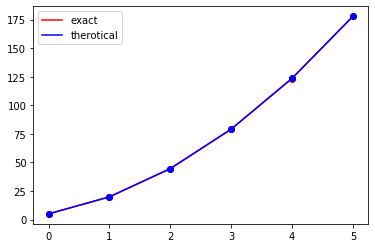

In [45]:
plt.figure(9)
plt.plot(t1,'r',label='exact')
for i in range(len(t1)):
    plt.plot(i,t1[i],'ro')
plt.plot(t2,'b',label='therotical')
for i in range(len(t2)):
    plt.plot(i,t2[i],'bo')
plt.legend()
plt.show()


 ### the ground state energy varies with  Δx=0.05,0.01and 0.005:-

In [46]:
sai9, e1, i1, energyl1, a1= squrewell(onedpotential, 0.005, 0.001, x, 1, 1, 1 )
print( "ground state energy for Δx=0.005, e1=",e1)

ground state energy for Δx=0.005, e1= 4.984802200550017


In [47]:
sai10, e1, i1, energyl2, a1= squrewell(onedpotential,0.05, 0.001, x, 1, 1, 1 )
print( "ground state energy for Δx=0.05, e1=",e1)

ground state energy for Δx=0.05, e1= 4.734802200549933


In [48]:
sai11, e1, i1, energyl1, a1= squrewell(onedpotential, 0.01, 0.001, x, 1, 1, 1 )
print( "ground state energy for Δx=0.01, e1=",e1)


ground state energy for Δx=0.01, e1= 4.734802200549933


### Lets check for the properly normalized wavefunctions

In [49]:
a=np.dot(sai1,sai1)
b=np.dot(sai2,sai2)
c=np.dot(sai3,sai3)
d=np.dot(sai4,sai4)
e=np.dot(sai5,sai5)
f=np.dot(sai6,sai6)

In [50]:
psi1=sai1/np.sqrt(a)
psi2=sai2/np.sqrt(b)
psi3=sai3/np.sqrt(c)
psi4=sai4/np.sqrt(d)
psi5=sai5/np.sqrt(e)
psi6=sai6/np.sqrt(f)

1.0
1.0
1.0
1.0
1.0
1.0
[1. 1. 1. 1. 1. 1.]


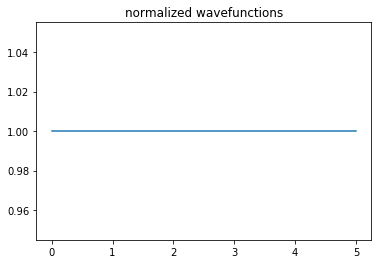

In [51]:
kk=[]

aa=np.dot(psi1,psi1)
kk.append(aa)
print(aa)
bb=np.dot(psi2,psi2)
kk.append(bb)
print(bb)
cc=np.dot(psi3,psi3)
kk.append(cc)
print(cc)
dd=np.dot(psi4,psi4)
kk.append(dd)
print(dd)
ee=np.dot(psi5,psi5)
kk.append(ee)
print(ee)
ff=np.dot(psi6,psi6)
kk.append(ff)
print(ff)

kk=np.array(kk)
print(kk)

plt.figure(12)
plt.plot(kk)
plt.title('normalized wavefunctions')
plt.show()



 ### Now check  the stationary states corrsponding to different quantum numbers are orthonormal:-

[-0.00031727173430552154, -0.0006307732567929732, -0.0009446583806339813, -0.00031677762164692216, 0.004892891700657899, -0.00031642105742736364, -0.0030790835786995447, -0.0006297909031282594, 0.002378906829194548, -0.0009431871885501153, -0.0006290820118224859, 0.0012422604917645057, -0.0009421255390496778]


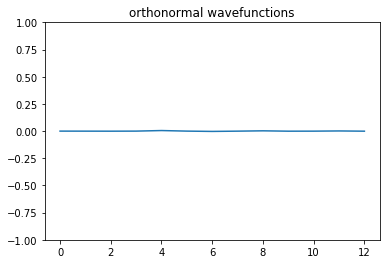

In [52]:
l=[]
n1=(np.dot(psi1,psi2))
l.append(n1)
n3=(np.dot(psi1,psi4))
l.append(n3)
n5=(np.dot(psi1,psi6))
l.append(n5)
n6=(np.dot(psi2,psi3))
l.append(n6)
n7=(np.dot(psi2,psi4))
l.append(n7)
n8=(np.dot(psi2,psi5))
l.append(n8)
n9=(np.dot(psi2,psi6))
l.append(n9)
n10=(np.dot(psi3,psi4))
l.append(n10)
n11=(np.dot(psi3,psi5))
l.append(n11)
n12=(np.dot(psi3,psi6))
l.append(n12)
n13=(np.dot(psi4,psi5))
l.append(n13)
n14=(np.dot(psi4,psi6))
l.append(n14)
n15=(np.dot(psi5,psi6))
l.append(n15)
    
print(l)

plt.figure(13)
plt.plot(l)
plt.title('orthonormal wavefunctions')

plt.ylim(-1,1)
plt.show()




##For even- and odd- parity solutions, plot $\psi(L)$ for different values of  E 

In [ ]:
CONTRI: Rachana 60 Nitish 40